<b>Transfer Learning</b>

In [1]:
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.
C:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
import glob
import numpy as np
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
np.random.seed(42)

In [3]:
files = glob.glob('E:/data/dogs-vs-cats/train/*') 

In [4]:
cat_files = [fn for fn in files if 'cat.' in fn]
dog_files = [fn for fn in files if 'dog.' in fn]

In [5]:
n=1000
cat_files=np.array(cat_files[:n])
dog_files=np.array(dog_files[:n])

In [6]:
train_size=600
val_size=200
test_size=200
cat_indices=np.random.permutation(n)
dog_indices=np.random.permutation(n) 
train_files=np.concatenate([cat_files[cat_indices[0:train_size]], dog_files[dog_indices[0:train_size]]]) 
val_files=np.concatenate([cat_files[cat_indices[train_size:train_size+val_size]], dog_files[dog_indices[train_size:train_size+val_size]]]) 
test_files=np.concatenate([cat_files[cat_indices[-test_size:]], dog_files[dog_indices[-test_size:]]]) 

print('shapes: ',train_files.shape, val_files.shape, test_files.shape)

shapes:  (1200,) (400,) (400,)


In [7]:
# train_files[595:605]

In [8]:
IMG_DIM = (150, 150)

In [9]:
train_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] )/255.0
val_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files] )/255.0
test_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files] )/255.0

In [10]:
print(f'shapes: {train_imgs.shape}  {val_imgs.shape}  {test_imgs.shape}')

shapes: (1200, 150, 150, 3)  (400, 150, 150, 3)  (400, 150, 150, 3)


In [11]:
train_imgs.dtype

dtype('float32')

In [12]:
train_files[:3]

array(['E:/data/dogs-vs-cats/train\\cat.10466.jpg',
       'E:/data/dogs-vs-cats/train\\cat.10660.jpg',
       'E:/data/dogs-vs-cats/train\\cat.10663.jpg'], dtype='<U40')

In [13]:
train_labels=[ file.split('\\')[1].split('.')[0] for file in train_files]
val_labels=[ file.split('\\')[1].split('.')[0] for file in val_files]
test_labels=[ file.split('\\')[1].split('.')[0] for file in test_files]

print( train_labels[595:605])
print(val_labels[195:205])
print(test_labels[195:205])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']


In [14]:
#name to number
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

In [15]:
test_labels_enc 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

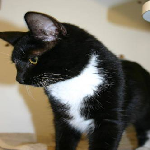

In [16]:
array_to_img(train_imgs[1])

In [17]:
16*27+16

448

In [18]:
input_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',   input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flat

1. Batch gradient descent
2. Stochastic gradient descent
3. Mini-batch gradient descent (32, 64, 128, 512, 1024)

In [19]:
train_imgs.shape

(1200, 150, 150, 3)

In [20]:
history = model.fit(x=train_imgs, y=train_labels_enc,
                    validation_data=(val_imgs, validation_labels_enc),
                    batch_size=32,
                    epochs=10,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1200 samples, validate on 400 samples
Epoch 1/10
1200/1200 [==============================] - 67s 56ms/step - loss: 4.3941 - acc: 0.4992 - val_loss: 0.6797 - val_acc: 0.5575
Epoch 2/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.7009 - acc: 0.5558 - val_loss: 0.6536 - val_acc: 0.6400
Epoch 3/10
1200/1200 [==============================] - 73s 61ms/step - loss: 0.6729 - acc: 0.6283 - val_loss: 0.6078 - val_acc: 0.6650
Epoch 4/10
1200/1200 [==============================] - 66s 55ms/step - loss: 0.5988 - acc: 0.6825 - val_loss: 0.7732 - val_acc: 0.5625
Epoch 5/10
1200/1200 [==============================] - 71s 59ms/step - loss: 0.5371 - acc: 0.7408 - val_loss: 0.5937 - val_acc: 0.7100
Epoch 6/10
1200/1200 [==============================] - 68s 57ms/step - loss: 0.4569 - acc: 0.7908 - val_loss: 1.3876 - val_acc: 0.5775
Epoch 7/10
1200/1200 [==============================] - 66s 55ms/step - loss: 0.3796 - ac

In [21]:
loss, acc=model.evaluate(test_imgs, test_labels_enc)
print(f'test accuracy {acc}')

400/400 [==============================] - 6s 14ms/step
test accuracy 0.6575


In [ ]:
# model.predict(test_imgs)

<b>Loading VGG</b>

<img src='vgg16.png' width=50%>

In [22]:
vgg = VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

In [23]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

(1, 4, 4, 512)


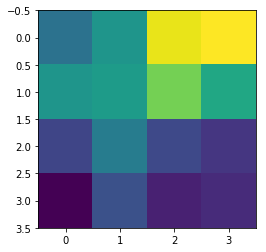

In [24]:
bottleneck_feature_example = vgg.predict(train_imgs[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [25]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    

In [26]:
train_features_vgg = get_bottleneck_features(vgg, train_imgs)
validation_features_vgg = get_bottleneck_features(vgg, val_imgs)
test_features_vgg = get_bottleneck_features(vgg, test_imgs)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape,
     '\nTest Bottleneck Features:', test_features_vgg.shape)

Train Bottleneck Features: (1200, 4, 4, 512) 	Validation Bottleneck Features: (400, 4, 4, 512) 
Test Bottleneck Features: (400, 4, 4, 512)


In [27]:
vgg_features_train=train_features_vgg.reshape(train_features_vgg.shape[0], -1)
vgg_features_val=validation_features_vgg.reshape(validation_features_vgg.shape[0], -1)
vgg_features_test=test_features_vgg.reshape(test_features_vgg.shape[0],-1)

In [28]:
vgg_features_train.shape

(1200, 8192)

In [29]:
vgg_features_val.shape

(400, 8192)

In [30]:
vgg_features_test.shape

(400, 8192)

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Activation

In [32]:
input_shape = vgg_features_train.shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',  optimizer=optimizers.RMSprop(lr=1e-4),  metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [33]:
# #batch normalization
# input_shape = vgg_features_train.shape[1]

# model = Sequential()
# model.add(InputLayer(input_shape=(input_shape,))) 
# model.add(Dense(512, input_dim=input_shape))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dropout(0.3))
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['accuracy'])

# model.summary()

In [34]:
history = model.fit(x=vgg_features_train, y=train_labels_enc,
                    validation_data=(vgg_features_val, validation_labels_enc),
                    batch_size=32,
                    epochs=20,
                    verbose=1)

Train on 1200 samples, validate on 400 samples
Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5284 - acc: 0.7300 - val_loss: 0.3460 - val_acc: 0.8800
Epoch 2/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3455 - acc: 0.8442 - val_loss: 0.3726 - val_acc: 0.8375
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2753 - acc: 0.8875 - val_loss: 0.2656 - val_acc: 0.8850
Epoch 4/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2318 - acc: 0.9108 - val_loss: 0.5374 - val_acc: 0.7500
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2079 - acc: 0.9183 - val_loss: 0.4958 - val_acc: 0.7750
Epoch 6/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1693 - acc: 0.9342 - val_loss: 0.2854 - val_acc: 0.8850
Epoch 7/20
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1396 - acc: 0.9558 - val_loss: 0.2712 - val_acc: 0.8800
Epoch 8/20
1200

In [35]:
loss, acc=model.evaluate(vgg_features_test, test_labels_enc)
print(f'test accuracy {acc}')

400/400 [==============================] - 0s 353us/step
test accuracy 0.8825


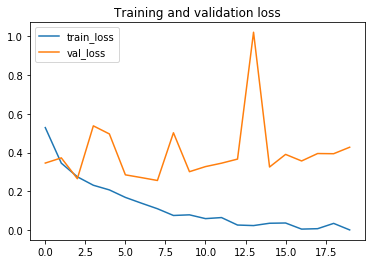

In [36]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

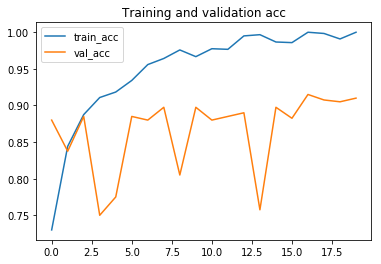

In [37]:
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label="val_acc")
plt.title('Training and validation acc')
plt.legend(loc="upper left")
plt.show()

In [38]:
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

<b>Imagenet Dataset: </b><br>
More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided

150 GB<br>
Class: 1,000 


1. AlexNet (5 conv, 3 FC)
2. VGG16 (16 layers)
3. Inception v3 (48 layers)
4. Resnet (152 layers)

<img src='cnn_arcs.png'>

<b>Transfer Learning</b>